In [56]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# How often each tool succeeded to deliver a pipeline within the given time budget?

In [48]:
result = pd.read_excel(r'C:\Users\HassanEldeeb\Documents\GitHub\AutoMLBenchmarking\Complete_Sheet.xlsx', null_values=['', 'NA', 'NAN', 'NaN', 'Nan', 'NA\n'], sheet_name=['10 Min', '30 Min', '60 Min', '4 Hours'])

In [49]:
result['30 Min'].smartml_valid_acc.dtype

dtype('float64')

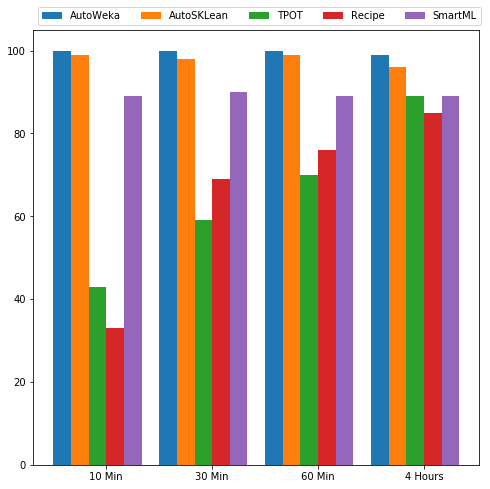

In [54]:
experiment_time = ['10 Min', '30 Min', '60 Min', '4 Hours']
frameworks = ['AutoWeka', 'AutoSKLean', 'TPOT', 'Recipe', 'SmartML']
#colors        = ['seagreen', 'red', 'orchid', 'orange']
autoweka = [np.count_nonzero(~np.isnan(result['10 Min'].autoweka_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['30 Min'].autoweka_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['60 Min'].autoweka_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['4 Hours'].autoweka_accuracy_mean))]
autoSKLearn = [np.count_nonzero(~np.isnan(result['10 Min'].sklearn_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['30 Min'].sklearn_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['60 Min'].sklearn_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['4 Hours'].sklearn_accuracy_mean))]
TPOT = [np.count_nonzero(~np.isnan(result['10 Min'].tpot_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['30 Min'].tpot_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['60 Min'].tpot_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['4 Hours'].tpot_accuracy_mean))]
Recipe = [np.count_nonzero(~np.isnan(result['10 Min'].recipe_test_acc)),
            np.count_nonzero(~np.isnan(result['30 Min'].recipe_test_acc)),
            np.count_nonzero(~np.isnan(result['60 Min'].recipe_test_acc)),
            np.count_nonzero(~np.isnan(result['4 Hours'].recipe_test_acc))]
SmartML = [np.count_nonzero(~np.isnan(result['10 Min'].smartml_valid_acc)),
            np.count_nonzero(~np.isnan(result['30 Min'].smartml_valid_acc)),
            np.count_nonzero(~np.isnan(result['60 Min'].smartml_valid_acc)),
            np.count_nonzero(~np.isnan(result['4 Hours'].smartml_valid_acc))]
numerical = [autoweka,
             autoSKLearn,
             TPOT,
             Recipe,
             SmartML]
number_groups = len(frameworks) 
bin_width = 1.0/(len(frameworks)+1)
fig, ax = plt.subplots(figsize=(8,8))
for i in range(number_groups):
    ax.bar(x=np.arange(len(experiment_time)) + i*bin_width, 
           height=numerical[i],
           width=bin_width,
          # color=colors[i],
           align='center')
ax.set_xticks(np.arange(len(experiment_time)) + number_groups/(2*(number_groups+1)))
# number_groups/(2*(number_groups+1)): offset of xticklabel
ax.set_xticklabels(experiment_time)
ax.legend(frameworks, ncol=len(frameworks), bbox_to_anchor=(0, 1), loc='lower left')

plt.show()

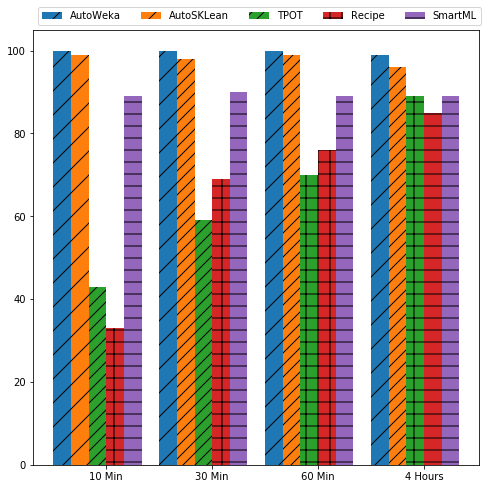

In [59]:
experiment_time = ['10 Min', '30 Min', '60 Min', '4 Hours']
frameworks = ['AutoWeka', 'AutoSKLean', 'TPOT', 'Recipe', 'SmartML']
#colors        = ['seagreen', 'red', 'orchid', 'orange']
autoweka = [np.count_nonzero(~np.isnan(result['10 Min'].autoweka_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['30 Min'].autoweka_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['60 Min'].autoweka_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['4 Hours'].autoweka_accuracy_mean))]
autoSKLearn = [np.count_nonzero(~np.isnan(result['10 Min'].sklearn_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['30 Min'].sklearn_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['60 Min'].sklearn_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['4 Hours'].sklearn_accuracy_mean))]
TPOT = [np.count_nonzero(~np.isnan(result['10 Min'].tpot_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['30 Min'].tpot_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['60 Min'].tpot_accuracy_mean)),
            np.count_nonzero(~np.isnan(result['4 Hours'].tpot_accuracy_mean))]
Recipe = [np.count_nonzero(~np.isnan(result['10 Min'].recipe_test_acc)),
            np.count_nonzero(~np.isnan(result['30 Min'].recipe_test_acc)),
            np.count_nonzero(~np.isnan(result['60 Min'].recipe_test_acc)),
            np.count_nonzero(~np.isnan(result['4 Hours'].recipe_test_acc))]
SmartML = [np.count_nonzero(~np.isnan(result['10 Min'].smartml_valid_acc)),
            np.count_nonzero(~np.isnan(result['30 Min'].smartml_valid_acc)),
            np.count_nonzero(~np.isnan(result['60 Min'].smartml_valid_acc)),
            np.count_nonzero(~np.isnan(result['4 Hours'].smartml_valid_acc))]
numerical = [autoweka,
             autoSKLearn,
             TPOT,
             Recipe,
             SmartML]
number_groups = len(frameworks) 
hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
bin_width = 1.0/(len(frameworks)+1)
fig, ax = plt.subplots(figsize=(8,8))
for i in range(number_groups):
    ax.bar(x=np.arange(len(experiment_time)) + i*bin_width, 
           height=numerical[i],
           width=bin_width,
          # color=colors[i],
           align='center')
for i, bar in enumerate(ax.patches):
    if i % number_groups == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
ax.set_xticks(np.arange(len(experiment_time)) + number_groups/(2*(number_groups+1)))
# number_groups/(2*(number_groups+1)): offset of xticklabel
ax.set_xticklabels(experiment_time)
ax.legend(frameworks, ncol=len(frameworks), bbox_to_anchor=(0, 1), loc='lower left')

plt.show()

# How many times each tool has achieved the best performance?